#Feature Tools

Featuretools is a powerful open-source Python library designed for automating the process of feature engineering. At its core is the concept of an EntitySet, which serves as a container for multiple tables (entities) and their relationships. Featuretools facilitates the creation of informative features through a technique called Deep Feature Synthesis (DFS), which automatically generates new features by stacking and combining existing ones. The library simplifies the representation of complex relational data by allowing users to define entities, establish relationships between them, and perform DFS to uncover hidden patterns and relationships within the data. This automated approach to feature engineering can significantly reduce the manual effort involved in creating features for machine learning models, making it a valuable tool for data scientists and analysts working with structured data.

##Data Selection

This dataset provides a comprehensive collection of synthetic job postings to facilitate research and analysis in the field of job market trends, natural language processing (NLP), and machine learning. Created for educational and research purposes, this dataset offers a diverse set of job listings across various industries and job types.


| Column           | Description                                                  |
|------------------|--------------------------------------------------------------|
| Job Id           | A unique identifier for each job posting.                    |
| Qualifications   | The educational qualifications needed for the job.           |
| Salary Range     | The range of salaries or compensation offered for the position.|
| Location         | The city or area where the job is located.                   |
| Country          | The country where the job is located.                         |
| Latitude         | The latitude coordinate of the job location.                  |
| Longitude        | The longitude coordinate of the job location.                 |
| Work Type        | The type of employment (e.g., full-time, part-time, contract).|
| Company Size     | The approximate size or scale of the hiring company.          |
| Job Posting Date | The date when the job posting was made public.                |
| Preference       | Special preferences or requirements for applicants.          |
| Contact Person   | The name of the contact person or recruiter for the job.      |
| Contact          | Contact information for job inquiries.                        |
| Job Title        | The job title or position being advertised.                  |
| Role             | The role or category of the job (e.g., software developer, marketing manager).|
| Job Portal       | The platform or website where the job was posted.            |
| Job Description  | A detailed description of the job responsibilities and requirements.|
| Benefits         | Information about benefits offered with the job (e.g., health insurance, retirement plans).|
| Skills           | The skills or qualifications required for the job.           |
| Responsibilities | Specific responsibilities and duties associated with the job.|
| Company Name     | The name of the hiring company.                               |
| Company Profile  | A brief overview of the company's background and mission.     |



##Data Loading

In [1]:
pip install featuretools

In [2]:
import featuretools as ft
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download ravindrasinghrana/job-description-dataset
!unzip job-description-dataset.zip

mkdir: cannot create directory ‘/root/.kaggle’: File exists
 99% 454M/457M [00:11<00:00, 43.6MB/s]
100% 457M/457M [00:11<00:00, 40.6MB/s]
Archive:  job-description-dataset.zip
  inflating: job_descriptions.csv    


In [4]:
df = pd.read_csv("job_descriptions.csv")
columns_list = df.columns
print(columns_list)

Index(['Job Id', 'Experience', 'Qualifications', 'Salary Range', 'location',
       'Country', 'latitude', 'longitude', 'Work Type', 'Company Size',
       'Job Posting Date', 'Preference', 'Contact Person', 'Contact',
       'Job Title', 'Role', 'Job Portal', 'Job Description', 'Benefits',
       'skills', 'Responsibilities', 'Company', 'Company Profile'],
      dtype='object')


##Data Preparation

In [5]:
# Get the number of rows in the Dask DataFrame and compute it
num_rows = df.shape[0]

# Display the number of rows
print("Number of rows:", num_rows)

Number of rows: 1615940


In [6]:
df.describe()

,Job Id,latitude,longitude,Company Size
count,1.615940e+06,1.615940e+06,1.615940e+06,1.615940e+06
mean,1.548935e+15,1.937743e+01,1.639926e+01,7.370467e+04
std,8.946722e+14,2.355690e+01,7.066762e+01,3.529886e+04
min,1.817948e+11,-4.090060e+01,-1.751982e+02,1.264600e+04
25%,7.740508e+14,5.152100e+00,-1.531010e+01,4.311400e+04
50%,1.547858e+15,1.807080e+01,1.914510e+01,7.363300e+04
75%,2.323729e+15,3.907420e+01,4.757690e+01,1.043000e+05
max,3.099618e+15,7.170690e+01,1.780650e+02,1.348340e+05


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1615940 entries, 0 to 1615939
Data columns (total 23 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Job Id            1615940 non-null  int64  
 1   Experience        1615940 non-null  object 
 2   Qualifications    1615940 non-null  object 
 3   Salary Range      1615940 non-null  object 
 4   location          1615940 non-null  object 
 5   Country           1615940 non-null  object 
 6   latitude          1615940 non-null  float64
 7   longitude         1615940 non-null  float64
 8   Work Type         1615940 non-null  object 
 9   Company Size      1615940 non-null  int64  
 10  Job Posting Date  1615940 non-null  object 
 11  Preference        1615940 non-null  object 
 12  Contact Person    1615940 non-null  object 
 13  Contact           1615940 non-null  object 
 14  Job Title         1615940 non-null  object 
 15  Role              1615940 non-null  object 
 16  

In [8]:
df.isnull()

,Job Id,Experience,Qualifications,Salary Range,location,Country,latitude,longitude,Work Type,Company Size,...,Contact,Job Title,Role,Job Portal,Job Description,Benefits,skills,Responsibilities,Company,Company Profile
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1615935,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1615936,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1615937,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1615938,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [9]:
df.head(10)

,Job Id,Experience,Qualifications,Salary Range,location,Country,latitude,longitude,Work Type,Company Size,...,Contact,Job Title,Role,Job Portal,Job Description,Benefits,skills,Responsibilities,Company,Company Profile
0,1089843540111562,5 to 15 Years,M.Tech,$59K-$99K,Douglas,Isle of Man,54.2361,-4.5481,Intern,26801,...,001-381-930-7517x737,Digital Marketing Specialist,Social Media Manager,Snagajob,Social Media Managers oversee an organizations...,"{'Flexible Spending Accounts (FSAs), Relocatio...","Social media platforms (e.g., Facebook, Twitte...","Manage and grow social media accounts, create ...",Icahn Enterprises,"{""Sector"":""Diversified"",""Industry"":""Diversifie..."
1,398454096642776,2 to 12 Years,BCA,$56K-$116K,Ashgabat,Turkmenistan,38.9697,59.5563,Intern,100340,...,461-509-4216,Web Developer,Frontend Web Developer,Idealist,Frontend Web Developers design and implement u...,"{'Health Insurance, Retirement Plans, Paid Tim...","HTML, CSS, JavaScript Frontend frameworks (e.g...","Design and code user interfaces for websites, ...",PNC Financial Services Group,"{""Sector"":""Financial Services"",""Industry"":""Com..."
2,481640072963533,0 to 12 Years,PhD,$61K-$104K,Macao,"Macao SAR, China",22.1987,113.5439,Temporary,84525,...,9687619505,Operations Manager,Quality Control Manager,Jobs2Careers,Quality Control Managers establish and enforce...,"{'Legal Assistance, Bonuses and Incentive Prog...",Quality control processes and methodologies St...,Establish and enforce quality control standard...,United Services Automobile Assn.,"{""Sector"":""Insurance"",""Industry"":""Insurance: P..."
3,688192671473044,4 to 11 Years,PhD,$65K-$91K,Porto-Novo,Benin,9.3077,2.3158,Full-Time,129896,...,+1-820-643-5431x47576,Network Engineer,Wireless Network Engineer,FlexJobs,"Wireless Network Engineers design, implement, ...","{'Transportation Benefits, Professional Develo...",Wireless network design and architecture Wi-Fi...,"Design, configure, and optimize wireless netwo...",Hess,"{""Sector"":""Energy"",""Industry"":""Mining, Crude-O..."
4,117057806156508,1 to 12 Years,MBA,$64K-$87K,Santiago,Chile,-35.6751,-71.5429,Intern,53944,...,343.975.4702x9340,Event Manager,Conference Manager,Jobs2Careers,A Conference Manager coordinates and manages c...,"{'Flexible Spending Accounts (FSAs), Relocatio...",Event planning Conference logistics Budget man...,Specialize in conference and convention planni...,Cairn Energy,"{""Sector"":""Energy"",""Industry"":""Energy - Oil & ..."
5,116831420231957,4 to 12 Years,MCA,$59K-$93K,Brussels,Belgium,50.5039,4.4699,Full-Time,23196,...,(973)791-5355x52199,Software Tester,Quality Assurance Analyst,Snagajob,A Quality Assurance Analyst tests software and...,"{'Life and Disability Insurance, Stock Options...",Quality assurance processes Testing methodolog...,Test software applications and systems to iden...,Adani Ports and Special Economic Zone,"{""Sector"":""Infrastructure"",""Industry"":""Ports a..."
6,1292168246729889,3 to 15 Years,PhD,$63K-$103K,George Town,Cayman Islands,19.3133,-81.2546,Temporary,26119,...,001-268-510-4362x789,Teacher,Classroom Teacher,FlexJobs,A Classroom Teacher educates students in a spe...,"{'Flexible Spending Accounts (FSAs), Relocatio...",Teaching pedagogy Classroom management Curricu...,"Plan and deliver engaging lessons, adapting te...",FedEx,"{""Sector"":""Logistics"",""Industry"":""Mail, Packag..."
7,1498778686197107,2 to 8 Years,M.Com,$65K-$102K,SÃ£o TomÃ©,Sao Tome and Principe,0.1864,6.6131,Contract,40558,...,667.202.6824x15893,UX/UI Designer,User Interface Designer,Indeed,User Interface Designers focus on the visual a...,"{'Employee Assistance Programs (EAP), Tuition ...",UI design principles and best practices Graphi...,Create visually appealing user interfaces (UI)...,Ryder System,"{""Sector"":""Transportation"",""Industry"":""Transpo..."
8,1680293940995740,2 to 9 Years,BBA,$65K-$102K,Male,Maldives,3.2028,73.2207,Temporary,105343,...,+1-337-946-9956x550,UX/UI Designer,Interaction Designer,Ind

In [10]:
# Convert 'Salary Range' column to int64
df['Salary Range'] = df['Salary Range'].str.replace('$', '')
df['Salary Range'] = df['Salary Range'].str.replace('K', '000')
df[['Min Salary', 'Max Salary']] = df['Salary Range'].str.split('-', expand=True)
df['Min Salary'] = pd.to_numeric(df['Min Salary'], errors='coerce')
df['Max Salary'] = pd.to_numeric(df['Max Salary'], errors='coerce')

# Assuming you want to keep the average salary, you can create a new column 'Average Salary'
df['Average Salary'] = (df['Min Salary'] + df['Max Salary']) / 2

# Verify the changes
print(df.dtypes)

<ipython-input-10-c5972f140339>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Salary Range'] = df['Salary Range'].str.replace('$', '')


Job Id                int64
Experience           object
Qualifications       object
Salary Range         object
location             object
Country              object
latitude            float64
longitude           float64
Work Type            object
Company Size          int64
Job Posting Date     object
Preference           object
Contact Person       object
Contact              object
Job Title            object
Role                 object
Job Portal           object
Job Description      object
Benefits             object
skills               object
Responsibilities     object
Company              object
Company Profile      object
Min Salary            int64
Max Salary            int64
Average Salary      float64
dtype: object


In [11]:
df['Job Posting Date'] = pd.to_datetime(df['Job Posting Date'], errors='coerce')

In [12]:
df.dtypes

Job Id                       int64
Experience                  object
Qualifications              object
Salary Range                object
location                    object
Country                     object
latitude                   float64
longitude                  float64
Work Type                   object
Company Size                 int64
Job Posting Date    datetime64[ns]
Preference                  object
Contact Person              object
Contact                     object
Job Title                   object
Role                        object
Job Portal                  object
Job Description             object
Benefits                    object
skills                      object
Responsibilities            object
Company                     object
Company Profile             object
Min Salary                   int64
Max Salary                   int64
Average Salary             float64
dtype: object

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1615940 entries, 0 to 1615939
Data columns (total 26 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   Job Id            1615940 non-null  int64         
 1   Experience        1615940 non-null  object        
 2   Qualifications    1615940 non-null  object        
 3   Salary Range      1615940 non-null  object        
 4   location          1615940 non-null  object        
 5   Country           1615940 non-null  object        
 6   latitude          1615940 non-null  float64       
 7   longitude         1615940 non-null  float64       
 8   Work Type         1615940 non-null  object        
 9   Company Size      1615940 non-null  int64         
 10  Job Posting Date  1615940 non-null  datetime64[ns]
 11  Preference        1615940 non-null  object        
 12  Contact Person    1615940 non-null  object        
 13  Contact           1615940 non-null  object

In [14]:
df.rename(columns={'Job Id': 'Job_Id'}, inplace=True)

In [15]:
df.head(10)

,Job_Id,Experience,Qualifications,Salary Range,location,Country,latitude,longitude,Work Type,Company Size,...,Job Portal,Job Description,Benefits,skills,Responsibilities,Company,Company Profile,Min Salary,Max Salary,Average Salary
0,1089843540111562,5 to 15 Years,M.Tech,59000-99000,Douglas,Isle of Man,54.2361,-4.5481,Intern,26801,...,Snagajob,Social Media Managers oversee an organizations...,"{'Flexible Spending Accounts (FSAs), Relocatio...","Social media platforms (e.g., Facebook, Twitte...","Manage and grow social media accounts, create ...",Icahn Enterprises,"{""Sector"":""Diversified"",""Industry"":""Diversifie...",59000,99000,79000.0
1,398454096642776,2 to 12 Years,BCA,56000-116000,Ashgabat,Turkmenistan,38.9697,59.5563,Intern,100340,...,Idealist,Frontend Web Developers design and implement u...,"{'Health Insurance, Retirement Plans, Paid Tim...","HTML, CSS, JavaScript Frontend frameworks (e.g...","Design and code user interfaces for websites, ...",PNC Financial Services Group,"{""Sector"":""Financial Services"",""Industry"":""Com...",56000,116000,86000.0
2,481640072963533,0 to 12 Years,PhD,61000-104000,Macao,"Macao SAR, China",22.1987,113.5439,Temporary,84525,...,Jobs2Careers,Quality Control Managers establish and enforce...,"{'Legal Assistance, Bonuses and Incentive Prog...",Quality control processes and methodologies St...,Establish and enforce quality control standard...,United Services Automobile Assn.,"{""Sector"":""Insurance"",""Industry"":""Insurance: P...",61000,104000,82500.0
3,688192671473044,4 to 11 Years,PhD,65000-91000,Porto-Novo,Benin,9.3077,2.3158,Full-Time,129896,...,FlexJobs,"Wireless Network Engineers design, implement, ...","{'Transportation Benefits, Professional Develo...",Wireless network design and architecture Wi-Fi...,"Design, configure, and optimize wireless netwo...",Hess,"{""Sector"":""Energy"",""Industry"":""Mining, Crude-O...",65000,91000,78000.0
4,117057806156508,1 to 12 Years,MBA,64000-87000,Santiago,Chile,-35.6751,-71.5429,Intern,53944,...,Jobs2Careers,A Conference Manager coordinates and manages c...,"{'Flexible Spending Accounts (FSAs), Relocatio...",Event planning Conference logistics Budget man...,Specialize in conference and convention planni...,Cairn Energy,"{""Sector"":""Energy"",""Industry"":""Energy - Oil & ...",64000,87000,75500.0
5,116831420231957,4 to 12 Years,MCA,59000-93000,Brussels,Belgium,50.5039,4.4699,Full-Time,23196,...,Snagajob,A Quality Assurance Analyst tests software and...,"{'Life and Disability Insurance, Stock Options...",Quality assurance processes Testing methodolog...,Test software applications and systems to iden...,Adani Ports and Special Economic Zone,"{""Sector"":""Infrastructure"",""Industry"":""Ports a...",59000,93000,76000.0
6,1292168246729889,3 to 15 Years,PhD,63000-103000,George Town,Cayman Islands,19.3133,-81.2546,Temporary,26119,...,FlexJobs,A Classroom Teacher educates students in a spe...,"{'Flexible Spending Accounts (FSAs), Relocatio...",Teaching pedagogy Classroom management Curricu...,"Plan and deliver engaging lessons, adapting te...",FedEx,"{""Sector"":""Logistics"",""Industry"":""Mail, Packag...",63000,103000,83000.0
7,1498778686197107,2 to 8 Years,M.Com,65000-102000,SÃ£o TomÃ©,Sao Tome and Principe,0.1864,6.6131,Contract,40558,...,Indeed,User Interface Designers focus on the visual a...,"{'Employee Assistance Programs (EAP), Tuition ...",UI design principles and best practices Graphi...,Create visually appealing user interfaces (UI)...,Ryder System,"{""Sector"":""Transportation"",""Industry"":""Transpo...",65000,102000,83500.0
8,1680293940995740,2 to 9 Years,BBA,65000-102000,Male,Maldives,3.2028,73.2207,Temporary,105343,...,Indeed,Interaction Designers specialize in designing ...,"{'Transportation Benefits, Professional Develo...",Interaction design principles User behavior an...,"Work on interaction design, defining how users...",Zee Entertainment Enterprises,"{""Sector"":""Media & Entertainment"",""Industry"":""...",65000,102000,83500.0


In [16]:
# Check for duplicate rows
duplicate_rows = df.duplicated()

# Print the rows with duplicates
print("Duplicate Rows except first occurrence:")
print(df[duplicate_rows])

# Count the number of duplicate rows
print("Number of duplicate rows:", duplicate_rows.sum())

Duplicate Rows except first occurrence:
Empty DataFrame
Columns: [Job_Id, Experience, Qualifications, Salary Range, location, Country, latitude, longitude, Work Type, Company Size, Job Posting Date, Preference, Contact Person, Contact, Job Title, Role, Job Portal, Job Description, Benefits, skills, Responsibilities, Company, Company Profile, Min Salary, Max Salary, Average Salary]
Index: []

[0 rows x 26 columns]
Number of duplicate rows: 0


In [17]:
sns.pairplot(df)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

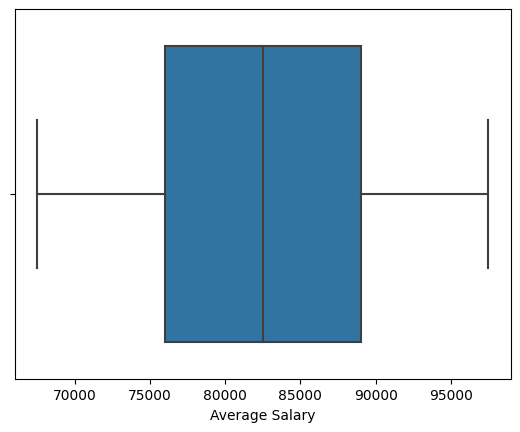

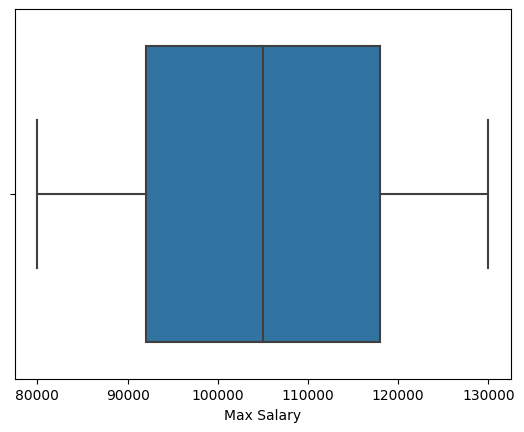

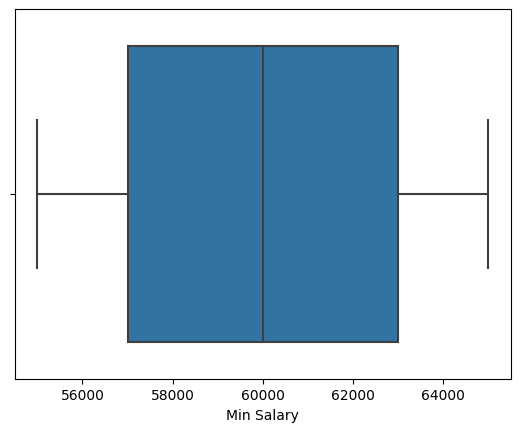

In [18]:
sns.boxplot(x='Average Salary', data=df)
plt.show()
sns.boxplot(x='Max Salary', data=df)
plt.show()
sns.boxplot(x='Min Salary', data=df)
plt.show()

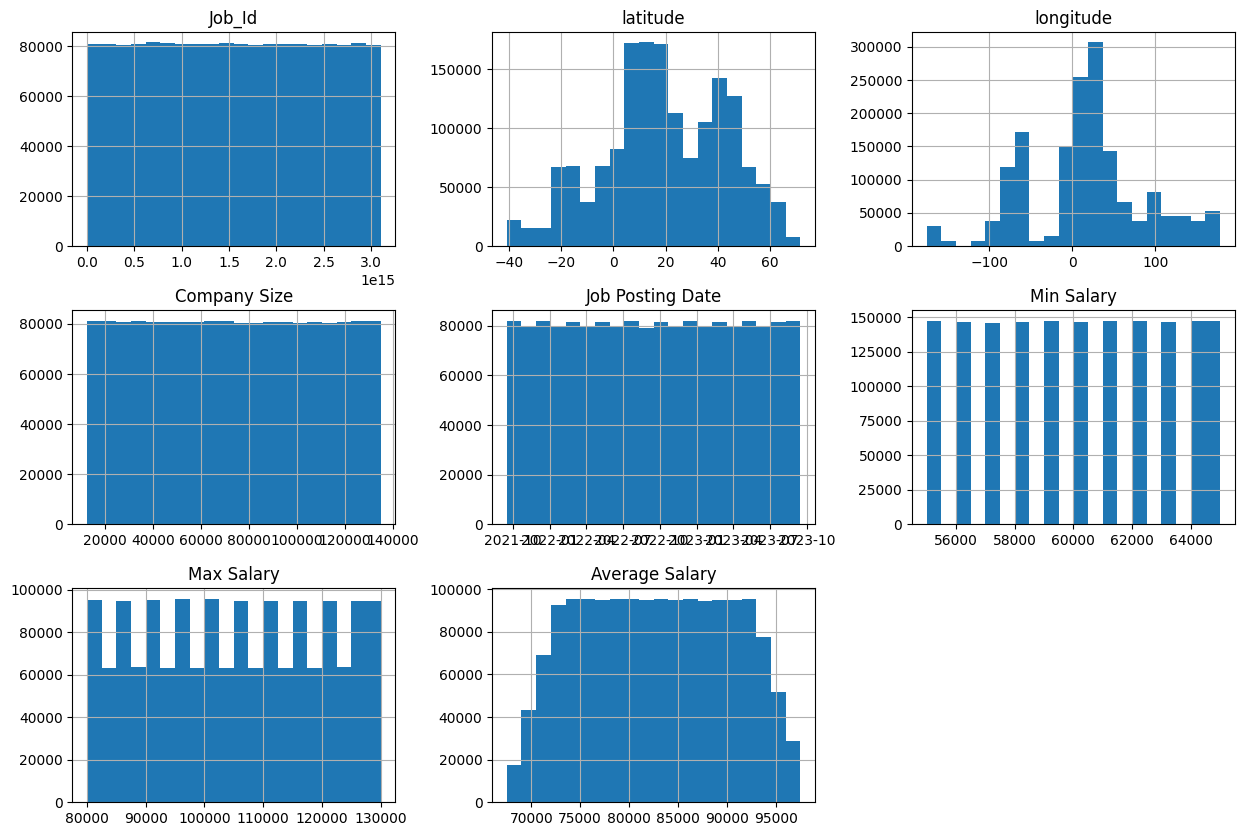

In [19]:
df.hist(bins=20, figsize=(15, 10))
plt.show()

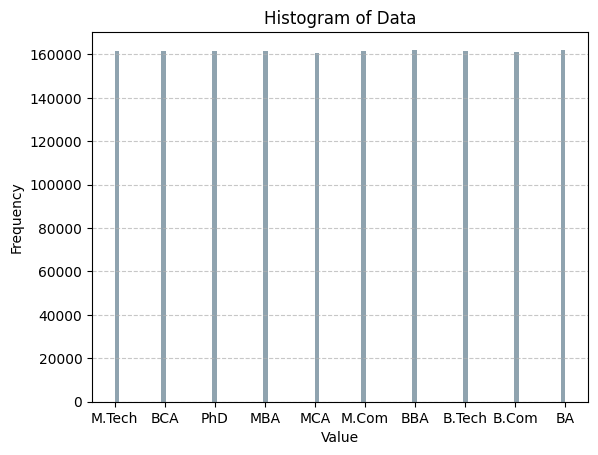

In [20]:
# Create a histogram
plt.hist(x=df['Qualifications'], bins='auto', color='#607c8e', alpha=0.7, rwidth=1.9)

# Set labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Data')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

##Automated Tool 2 - Featuretools

In [21]:
es = ft.EntitySet(id = 'Jobs')

In [62]:
WorkTypes_df = pd.DataFrame(df['Work Type'].unique(), columns=["W_T"])

In [73]:
WorkTypes_df

,W_T
Part-Time,Part-Time
Temporary,Temporary
Intern,Intern
Contract,Contract
Full-Time,Full-Time


In [59]:
es = es.add_dataframe(
    dataframe_name="Jobs",
    dataframe=df,
    index="Job_Id",
    time_index="Job Posting",
)

es

/usr/local/lib/python3.10/dist-packages/featuretools/entityset/entityset.py:754: UserWarning: A Woodwork-initialized DataFrame was provided, so the following parameters were ignored: index, time_index
  warnings.warn(


Entityset: Jobs
  DataFrames:
    Jobs [Rows: 1615940, Columns: 26]
  Relationships:
    No relationships

In [83]:
es = es.add_dataframe(dataframe=WorkTypes_df, dataframe_name='workType', index='W_T')

In [64]:
# Perform deep feature synthesis without specifying primitives
features, feature_names = ft.dfs(entityset=es, target_dataframe_name='Jobs',  max_depth = 1)

In [65]:
print(features.columns)

Index(['Experience', 'Qualifications', 'Salary Range', 'location', 'Country',
       'latitude', 'longitude', 'Work Type', 'Company Size', 'Preference',
       'Job Title', 'Role', 'Job Portal', 'Job Description', 'Benefits',
       'skills', 'Responsibilities', 'Company', 'Company Profile',
       'Min Salary', 'Max Salary', 'Average Salary', 'DAY(Job Posting Date)',
       'MONTH(Job Posting Date)', 'WEEKDAY(Job Posting Date)',
       'YEAR(Job Posting Date)'],
      dtype='object')


In [35]:
ft.primitives.list_primitives()

,name,type,dask_compatible,spark_compatible,description,valid_inputs,return_type
0,median,aggregation,False,False,Determines the middlemost number in a list of ...,<ColumnSchema (Semantic Tags = ['numeric'])>,<ColumnSchema (Semantic Tags = ['numeric'])>
1,count_inside_nth_std,aggregation,False,False,Determines the count of observations that lie ...,<ColumnSchema (Semantic Tags = ['numeric'])>,<ColumnSchema (Logical Type = Integer) (Semant...
2,percent_unique,aggregation,False,False,Determines the percent of unique values.,<ColumnSchema (Semantic Tags = ['category'])>,<ColumnSchema (Logical Type = Double) (Semanti...
3,n_unique_days_of_calendar_year,aggregation,False,False,Determines the number of unique calendar days.,<ColumnSchema (Logical Type = Datetime)>,<ColumnSchema (Logical Type = Integer) (Semant...
4,all,aggregation,True,False,Calculates if all values are 'True' in a list.,<ColumnSchema (Logical Type = BooleanNullable)...,<ColumnSchema (Logical Type = Boolean)>
...,...,...,...,...,...,...,...
198,num_characters,transform,True,True,Calculates the number of characters in a given...,<ColumnSchema (Logical Type = NaturalLanguage)>,<ColumnSchema (Logical Type = IntegerNullable)...
199,number_of_mentions,transform,False,False,Determines the number of mentions in a string.,<ColumnSchema (Logical Type = NaturalLanguage)>,<ColumnSchema (Logical Type = IntegerNullable)...
200,url_to_tld,transform,False,False,Determines the top level domain of a url.,<ColumnSchema (Logical Type = URL)>,<ColumnSchema (Logical Type = Categorical) (Se...
201,cosine,transform,True,True,Computes the cosine of a number.,<ColumnSchema (Semantic Tags = ['numeric'])>,<ColumnSchema (Logical Type = Double) (Semanti...


In [88]:
feature_matrix, feature_defs = ft.dfs(entityset=es, target_dataframe_name='Jobs',
                                      trans_primitives=['multiply_numeric','add_numeric','subtract_numeric'])

# Display the resulting feature matrix
print(feature_matrix.head())


ColumnNotPresentInSchemaError: ignored

In [71]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1615940 entries, 692798477877 to 3099361202470999
Data columns (total 26 columns):
 #   Column                     Non-Null Count    Dtype   
---  ------                     --------------    -----   
 0   Experience                 1615940 non-null  category
 1   Qualifications             1615940 non-null  category
 2   Salary Range               1615940 non-null  category
 3   location                   1615940 non-null  category
 4   Country                    1615940 non-null  category
 5   latitude                   1615940 non-null  float64 
 6   longitude                  1615940 non-null  float64 
 7   Work Type                  1615940 non-null  category
 8   Company Size               1615940 non-null  int64   
 9   Preference                 1615940 non-null  category
 10  Job Title                  1615940 non-null  category
 11  Role                       1615940 non-null  category
 12  Job Portal                 1615940 n

##**Visualization**

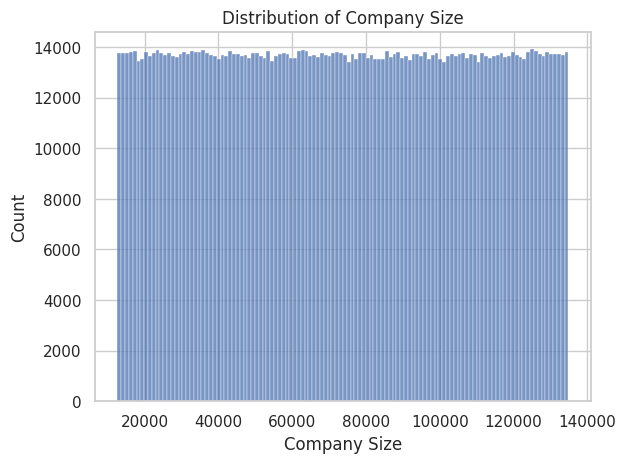

In [53]:
# Distribution of 'Company Size'
sns.histplot(df['Company Size'])
plt.title('Distribution of Company Size over the Years')
plt.show()


<ipython-input-85-46f8db853d4f>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Work Type', y='Average Salary', data=df, ci=None, palette='viridis')


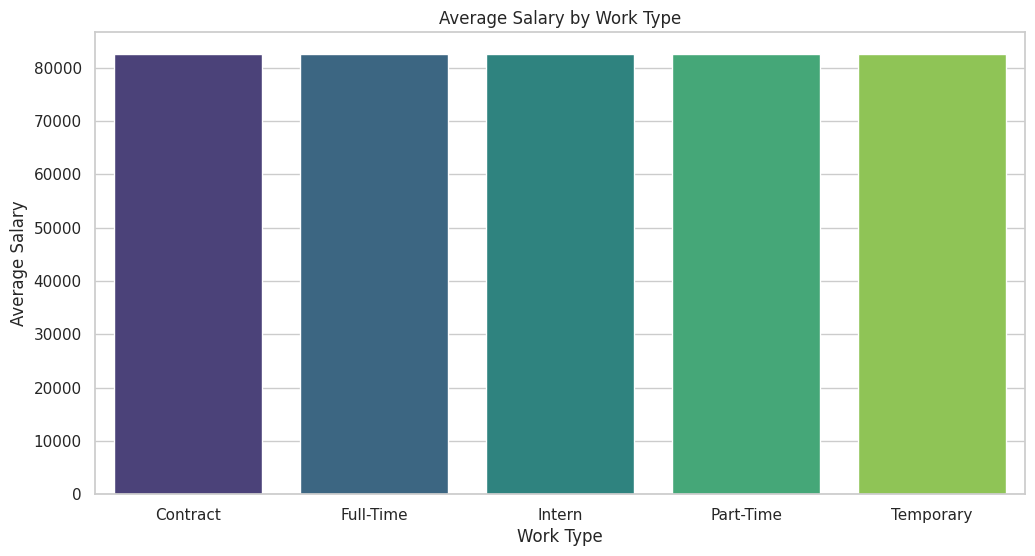

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn
sns.set(style="whitegrid")

# Visualize the relationship between 'Work Type' and 'Average Salary'
plt.figure(figsize=(12, 6))
sns.barplot(x='Work Type', y='Average Salary', data=df, ci=None, palette='viridis')
plt.title('Average Salary by Work Type')
plt.xlabel('Work Type')
plt.ylabel('Average Salary')

plt.show()
